In [1]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
import pandas as pd
import numpy as np

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed', dayfirst=False)

In [5]:
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

<ipython-input-5-164c23414256>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-5-164c23414256>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [6]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['genre_split'] = df['listed_in'].str.split(', ')
df['country_split'] = df['country'].str.split(', ')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre_split,country_split
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,[Documentaries],[United States]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,"[International TV Shows, TV Dramas, TV Mysteries]",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,"[Crime TV Shows, International TV Shows, TV Ac...",[Unknown]
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,"[Docuseries, Reality TV]",[Unknown]
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,"[International TV Shows, Romantic TV Shows, TV...",[India]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")

<ipython-input-12-6695921eb746>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


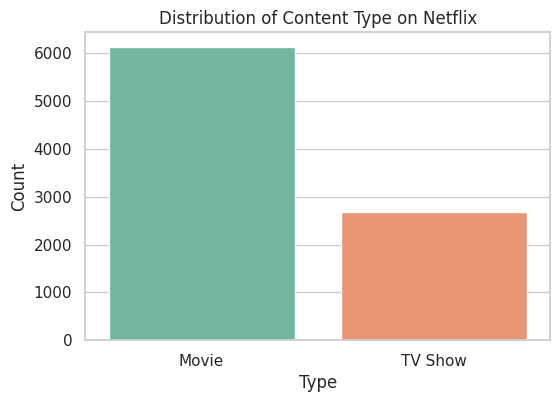

In [12]:
# 1. Content Type Distribution (Movie vs TV Show)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

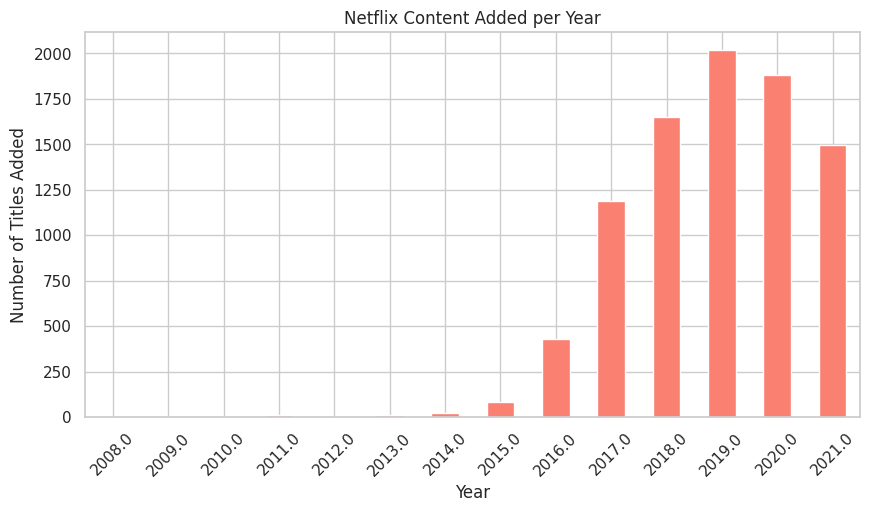

In [13]:
# 2. Netflix Content added each year
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Netflix Content Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-1ad5002b01e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


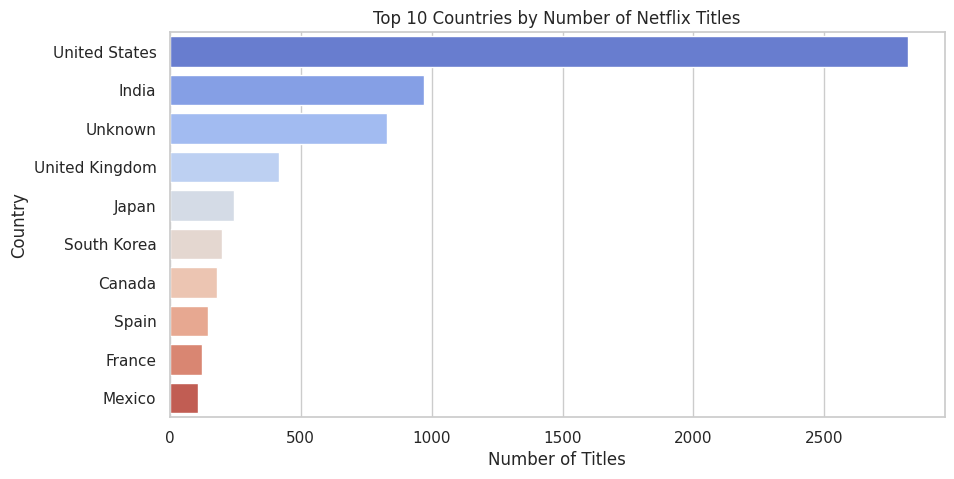

In [14]:
# 3. Top 10 Countries with Most Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

<ipython-input-15-c2c16c019b20>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='magma')


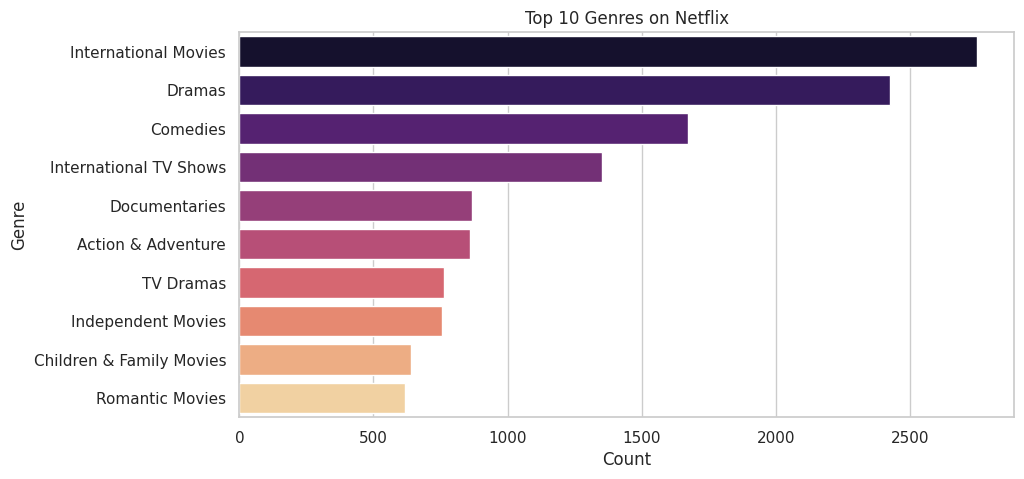

In [15]:
# 4. Most Popular Genres
from collections import Counter
import itertools

# Flatten all genres
genre_list = list(itertools.chain(*df['genre_split'].dropna()))
genre_counts = Counter(genre_list)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='magma')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

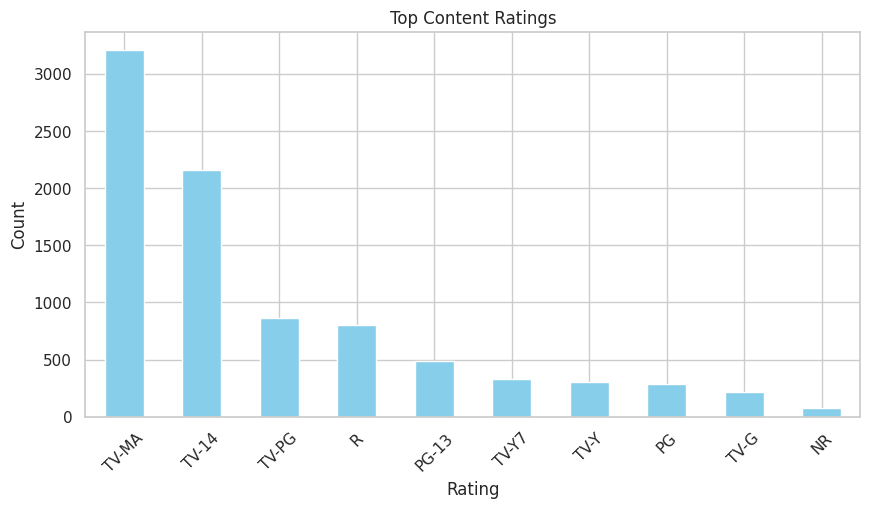

In [16]:
# 5. Content Rating Distribution
plt.figure(figsize=(10,5))
df['rating'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-df281252d715>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_name', order=list(month_map.values()), palette='Spectral')


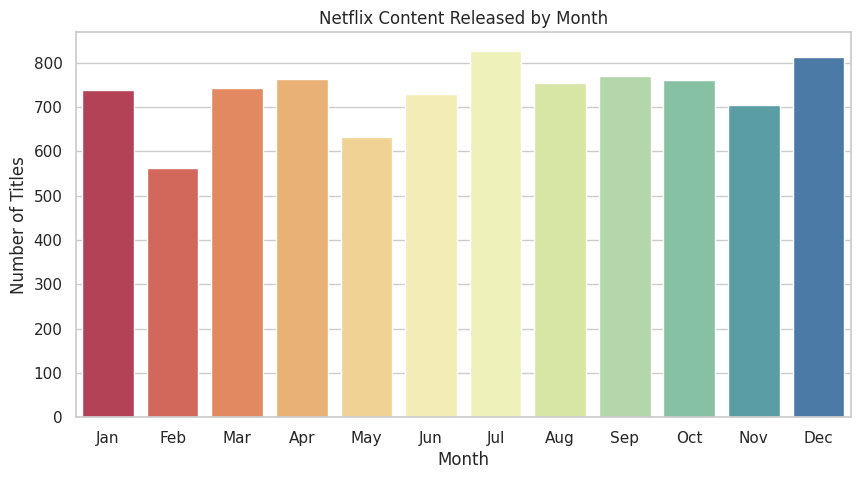

In [17]:
# 6. Best Months to Release Content (Based on Date Added)
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
df['month_name'] = df['month_added'].map(month_map)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month_name', order=list(month_map.values()), palette='Spectral')
plt.title("Netflix Content Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

In [18]:
# 7. Clustering Titles by Genre
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans

# Use MultiLabelBinarizer to encode genres as binary features
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_split'].dropna())

# Fit KMeans with 5 clusters (you can tweak cluster count)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(genre_encoded)

# Add cluster info to dataframe (only for rows with genre info)
df.loc[df['genre_split'].notna(), 'genre_cluster'] = clusters

# See how clusters group genres
for i in range(5):
    print(f"Cluster {i}:")
    genres_in_cluster = mlb.classes_[kmeans.cluster_centers_[i] > 0.2]
    print(list(genres_in_cluster))
    print()


Cluster 0:
['Crime TV Shows', 'International TV Shows', 'Romantic TV Shows', 'TV Comedies']

Cluster 1:
['Comedies', 'Dramas']

Cluster 2:
['Crime TV Shows', 'International TV Shows', 'TV Dramas']

Cluster 3:
['Comedies', 'Dramas', 'International Movies']

Cluster 4:
['Documentaries', 'International Movies']



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


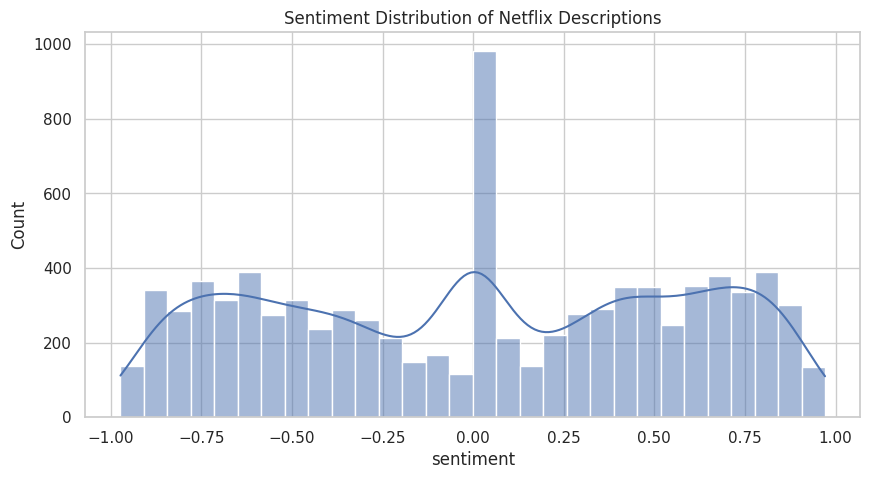

In [19]:
# 8. Sentiment Analysis of Descriptions
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Apply sentiment analyzer on description column
df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Show sentiment distribution
plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution of Netflix Descriptions")
plt.show()

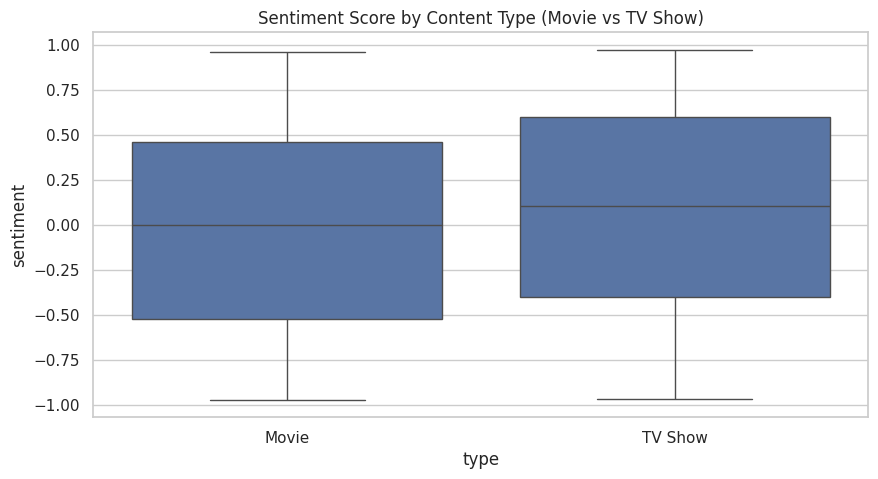

In [20]:
# 9. Correlation Between Rating and Sentiment
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='type', y='sentiment')
plt.title("Sentiment Score by Content Type (Movie vs TV Show)")
plt.show()

<ipython-input-21-ecccbfad3008>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=actors, palette='viridis')


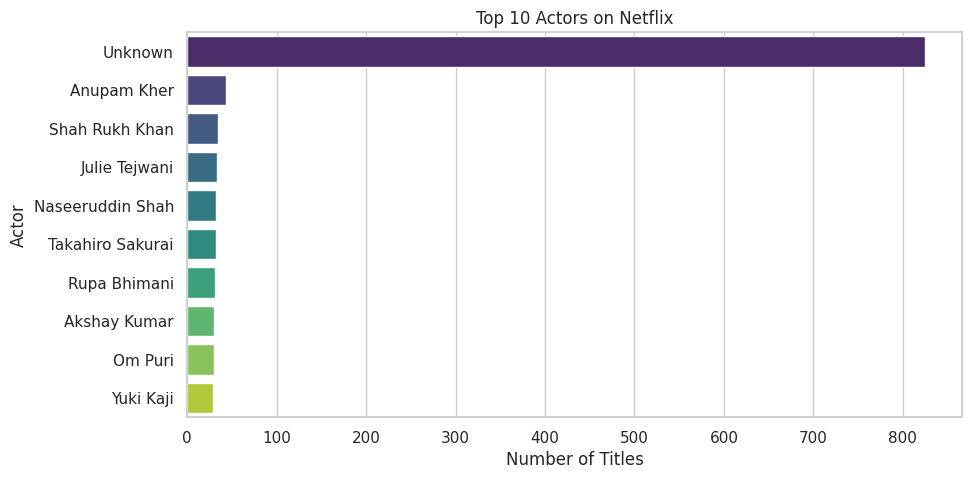

In [21]:
# 10. Top Actors Analysis
# Split cast into list
df['cast_split'] = df['cast'].str.split(', ')

# Flatten and count
all_actors = list(itertools.chain(*df['cast_split'].dropna()))
actor_counts = Counter(all_actors)
top_actors = actor_counts.most_common(10)

actors, counts = zip(*top_actors)

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=actors, palette='viridis')
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

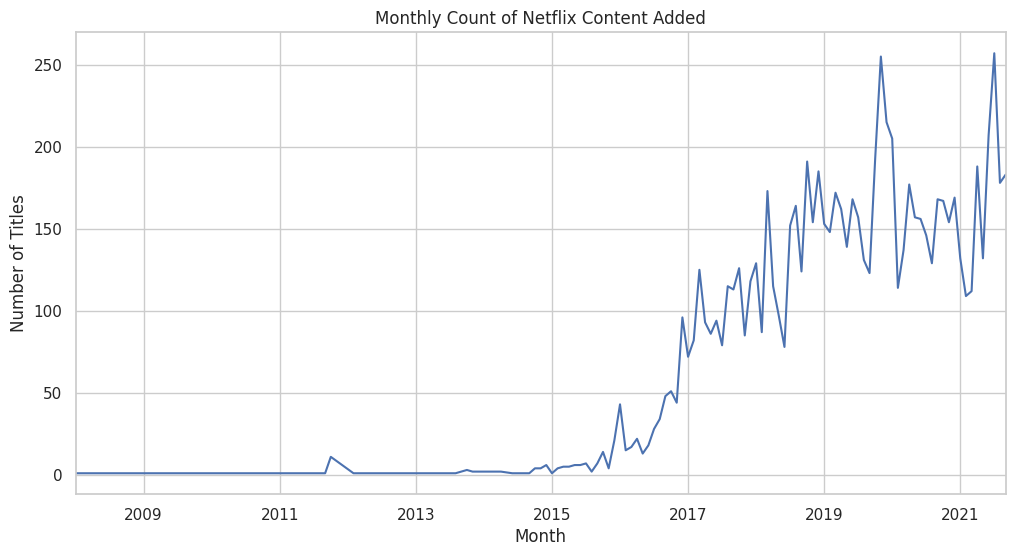

In [22]:
# 11. Time Series Analysis of Content Release
df['date_only'] = df['date_added'].dt.to_period('M')
monthly_counts = df.groupby('date_only').size()

plt.figure(figsize=(12,6))
monthly_counts.plot()
plt.title("Monthly Count of Netflix Content Added")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

In [23]:
# Using Clustering to Suggest New Content Strategies

In [24]:
# Preparing Data for clustering
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(df['genre_split'].dropna())

In [25]:
# Applying K-means clustering
from sklearn.cluster import KMeans

k = 5  # Number of clusters (tune if needed)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(genre_features)

# Add cluster labels back to dataframe (only for rows with genres)
df.loc[df['genre_split'].notna(), 'genre_cluster'] = clusters

In [26]:
# Analyzing each cluster for content strategy insights
import numpy as np

for i in range(k):
    cluster_indices = df[df['genre_cluster'] == i].index
    cluster_genres = np.array(df.loc[cluster_indices, 'genre_split'].explode())

    # Count genres in this cluster
    genre_counts = pd.Series(cluster_genres).value_counts()

    print(f"\n--- Cluster {i} Key Genres ---")
    print(genre_counts.head(5))

    # Summarize other factors like average rating, content type distribution
    avg_rating = df.loc[cluster_indices, 'rating'].dropna().astype('category').cat.codes.mean()
    type_counts = df.loc[cluster_indices, 'type'].value_counts(normalize=True)

    print(f"Content Type Distribution:\n{type_counts}")
    print(f"Average Rating Code (numeric proxy): {avg_rating:.2f}")



--- Cluster 0 Key Genres ---
International TV Shows       837
Romantic TV Shows            227
TV Comedies                  201
Crime TV Shows               190
Spanish-Language TV Shows    131
Name: count, dtype: int64
Content Type Distribution:
type
TV Show    1.0
Name: proportion, dtype: float64
Average Rating Code (numeric proxy): 2.40

--- Cluster 1 Key Genres ---
Dramas                      943
Comedies                    868
Children & Family Movies    605
Independent Movies          464
Action & Adventure          460
Name: count, dtype: int64
Content Type Distribution:
type
Movie      0.723196
TV Show    0.276804
Name: proportion, dtype: float64
Average Rating Code (numeric proxy): 9.87

--- Cluster 2 Key Genres ---
TV Dramas                 763
International TV Shows    514
Crime TV Shows            180
Romantic TV Shows         120
TV Comedies               106
Name: count, dtype: int64
Content Type Distribution:
type
TV Show    1.0
Name: proportion, dtype: float64
Average 

In [27]:
# Using Association Rule Mining (Apriori) to Suggest Genre Combinations
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Create genre one-hot encoded dataframe
genre_df = pd.DataFrame(genre_features, columns=mlb.classes_)

# Apply apriori
freq_items = apriori(genre_df, min_support=0.05, use_colnames=True)

# Generate rules with confidence threshold
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

            antecedents               consequents   support  confidence  \
0  (Independent Movies)                  (Dramas)  0.066765    0.777778   
1              (Dramas)    (International Movies)  0.168389    0.611042   
2           (TV Dramas)  (International TV Shows)  0.058363    0.673657   

       lift  
0  2.822369  
1  1.955469  
2  4.391483  


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
# Creating streamlit app to showcase the project

In [41]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [44]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
print(df.head())
print(df.columns)
print(df.shape)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        